# Workshop III

Created by **Cristian alape** and **Viviana mora**.

In [3]:
import sys  
sys.path.insert(0,'/home/cristian/Fourier_analysis/makelab')
import makelab
from makelab import signal
import ipywidgets
import IPython.display as ipd

## 1. Creando una señal de tono C (261.6256 Hz) Podrá escuchar el tono

In [4]:
sampling_rate = 16000 #frecuencia de muestreo 
total_time_in_secs = 0.5 #duracion de la señal
freq = 261.6256 #frecuencia de un piano 

c4_signal = makelab.signal.create_sine_wave(freq, sampling_rate,total_time_in_secs) 

### Plot con Zoom aumentado 

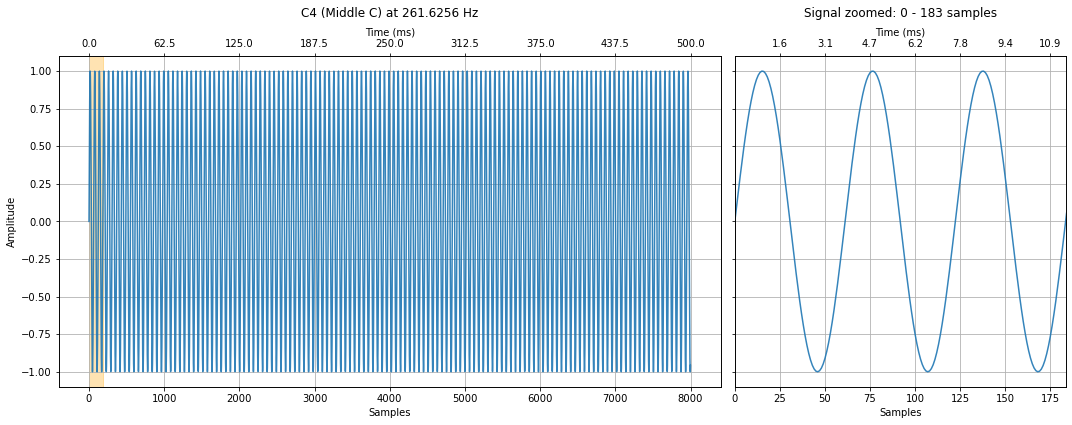

In [5]:
#1. Creación de una señal de tono C (261,6256 Hz) 
zoom_show_num_periods = 3
xlim_zoom = (0, zoom_show_num_periods * 1 / freq * sampling_rate)

title = "C4 (Middle C) at 261.6256 Hz"
makelab.signal.plot_signal(c4_signal, sampling_rate, title = title, xlim_zoom = xlim_zoom)
ipd.Audio(c4_signal , rate=sampling_rate)

## Creando una señal de tono A4 (440 Hz) un Tenor C (523.2511) y A5 (880 Hz).

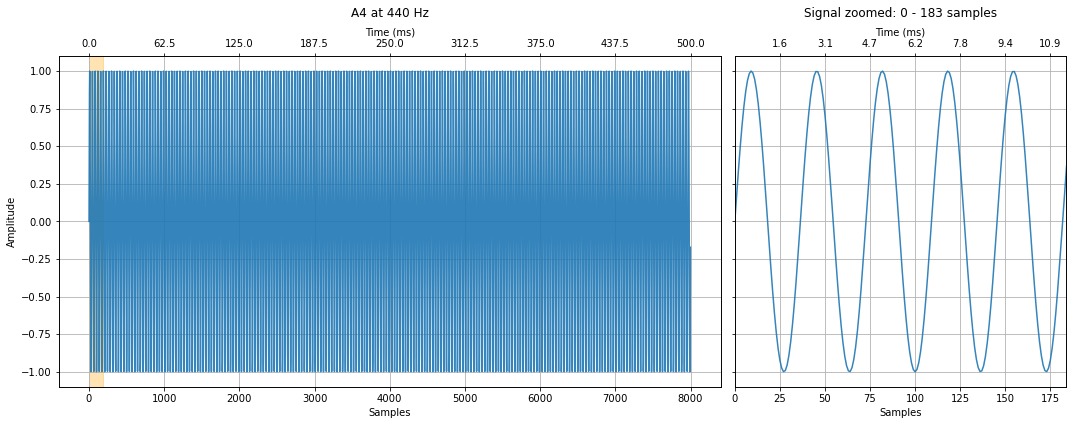

In [6]:
#1.1 Creación de una señal de tono C (440 Hz) con Tenor C (523.2511) y A5 (880 Hz).

freq = 440
A4_signal = makelab.signal.create_sine_wave(freq, sampling_rate,total_time_in_secs) 

title = "A4 at 440 Hz"
makelab.signal.plot_signal(A4_signal, sampling_rate, title = title, xlim_zoom = xlim_zoom)
ipd.Audio(A4_signal, rate=sampling_rate)

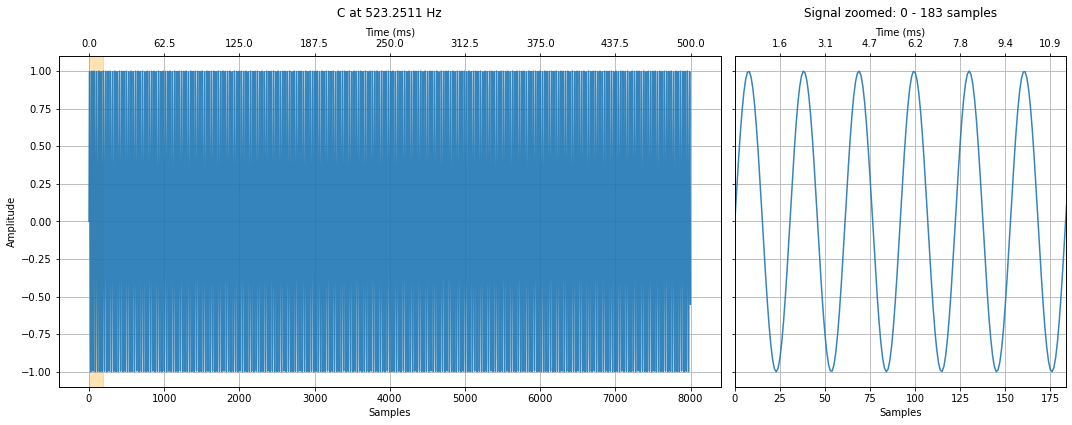

In [7]:
freq = 523.2511
C_signal = makelab.signal.create_sine_wave(freq, sampling_rate,total_time_in_secs) 

title = "C at 523.2511 Hz"
makelab.signal.plot_signal(C_signal, sampling_rate, title = title, xlim_zoom = xlim_zoom)
ipd.Audio(C_signal, rate=sampling_rate)

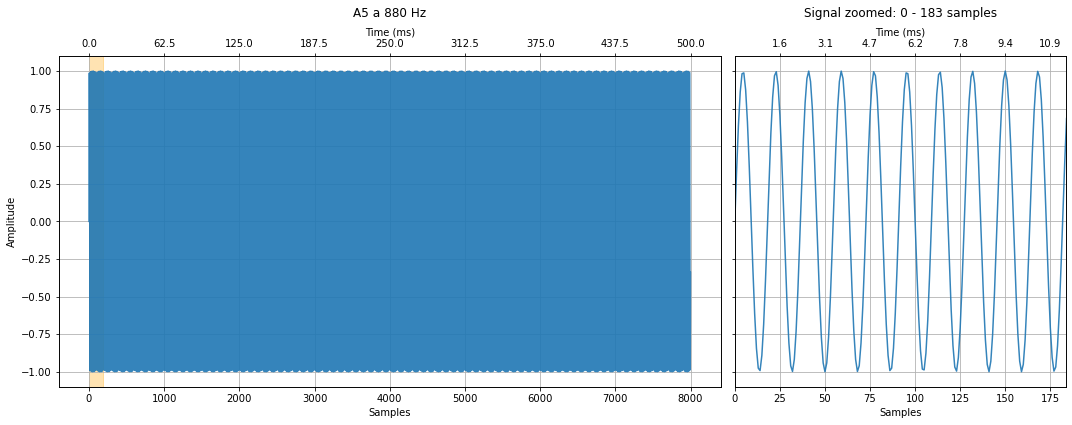

In [8]:
freq = 880
A5_signal = makelab.signal.create_sine_wave(freq, sampling_rate,total_time_in_secs)

title = "A5 a 880 Hz"
makelab.signal.plot_signal(A5_signal, sampling_rate, title = title, xlim_zoom = xlim_zoom)

ipd.Audio(A5_signal, rate=sampling_rate)

## 2. Crea acordes sumando las señales y divide la suma por n siendo n el número de señales involucradas. Puedes hacer A4 + A5 o Tenor C + A5 + C. Visualiza y toca

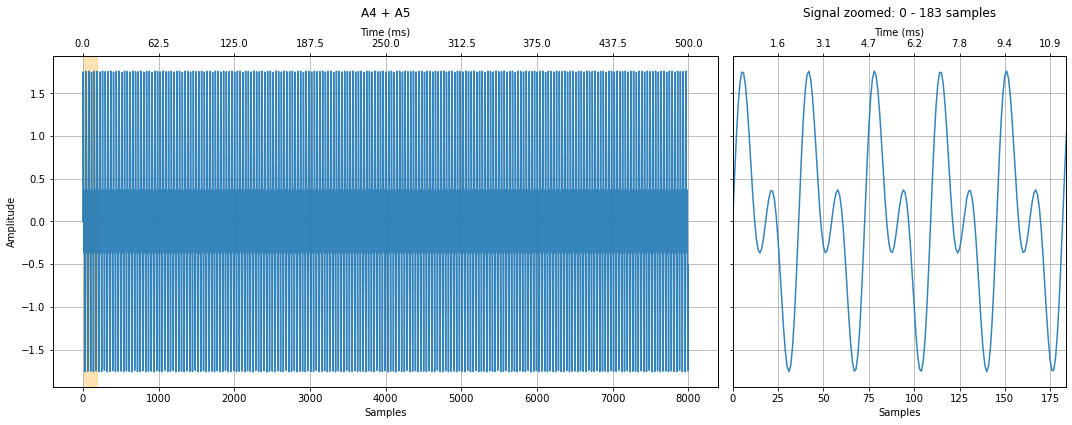

In [9]:
signal_A4A5=A4_signal+A5_signal
title = "A4 + A5"
makelab.signal.plot_signal(signal_A4A5, sampling_rate, title = title, xlim_zoom = xlim_zoom)

ipd.Audio(signal_A4A5, rate=sampling_rate)

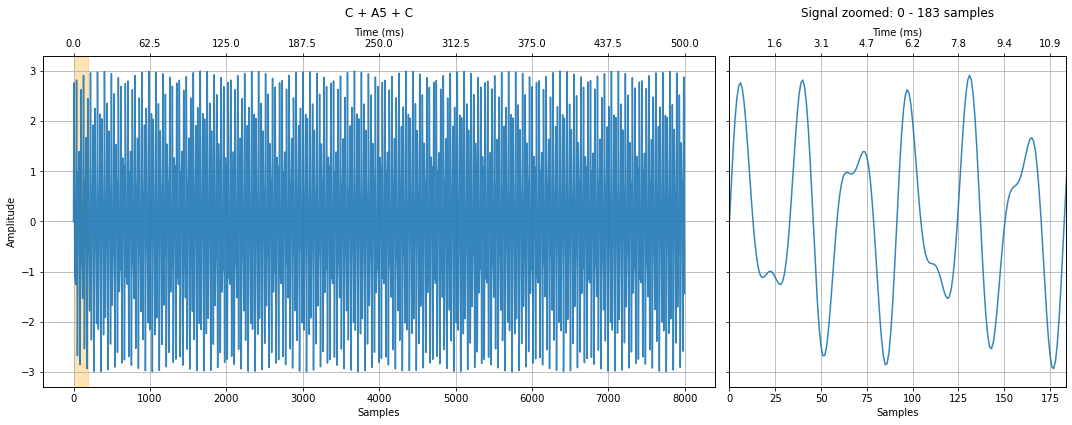

In [10]:
signal_CA5C=C_signal+A5_signal+C_signal
title = "C + A5 + C"
makelab.signal.plot_signal(signal_CA5C, sampling_rate, title = title, xlim_zoom = xlim_zoom)

ipd.Audio(signal_CA5C, rate=sampling_rate)

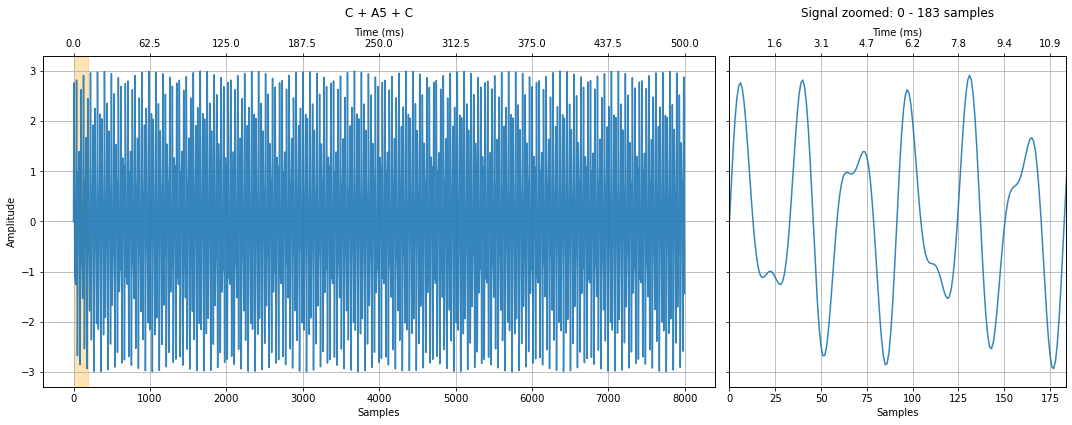## 3. Cree un acorde completo agregando todos los tonos creados. Visualiza y toca.

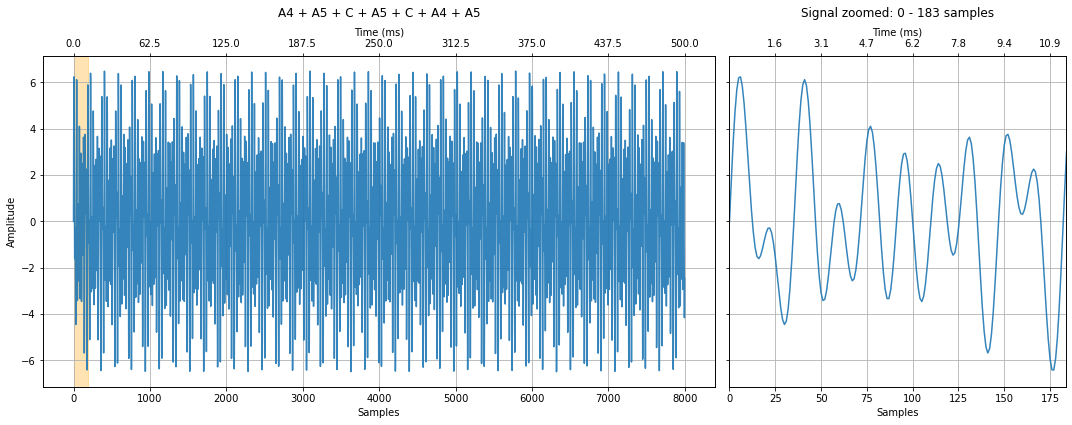

In [11]:
signal_final=signal_A4A5+signal_CA5C+signal_A4A5
title = "A4 + A5 + C + A5 + C + A4 + A5"
makelab.signal.plot_signal(signal_final, sampling_rate, title = title, xlim_zoom = xlim_zoom)
ipd.Audio(signal_final, rate=sampling_rate)

## 4. Enfatice una o dos de sus señales modificando aleatoriamente la amplitud de uno o varios de los tonos. p.e
## mi_acorde = 0.6*A4 + 0.4*Tenor C. Recuerda que la suma de la amplitud de tus señales debe sumar 1. Visualiza ## y toca.

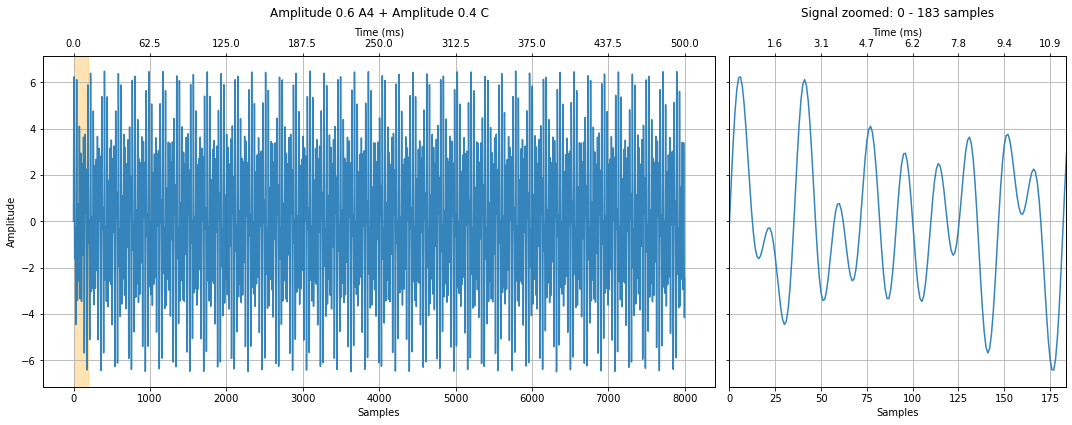

In [12]:
my_chord=0.6*A4_signal+0.4*C_signal
title = "Amplitude 0.6 A4 + Amplitude 0.4 C"
makelab.signal.plot_signal(signal_final, sampling_rate, title = title, xlim_zoom = xlim_zoom)
ipd.Audio(my_chord, rate=sampling_rate)

## 5. Encuentra en Internet la frecuencia de los otros tonos y crea una función que te pueda devolver C4, E4, G4.

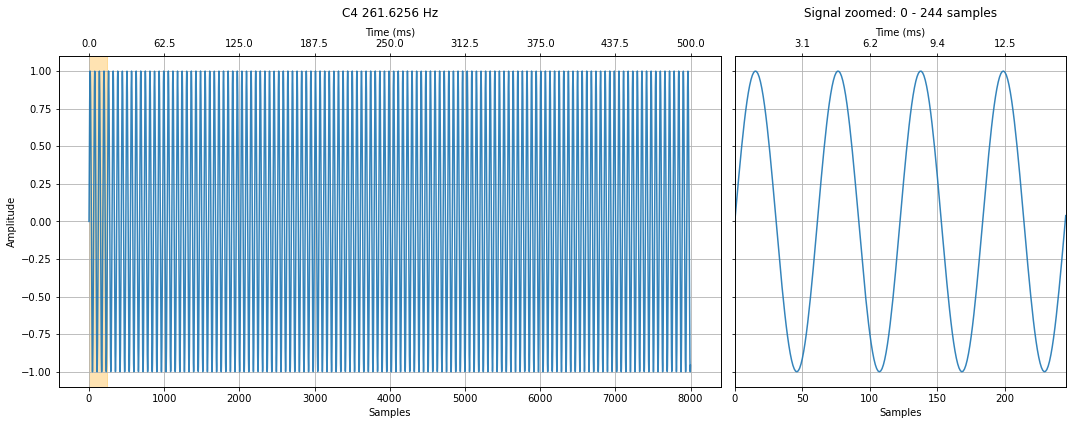

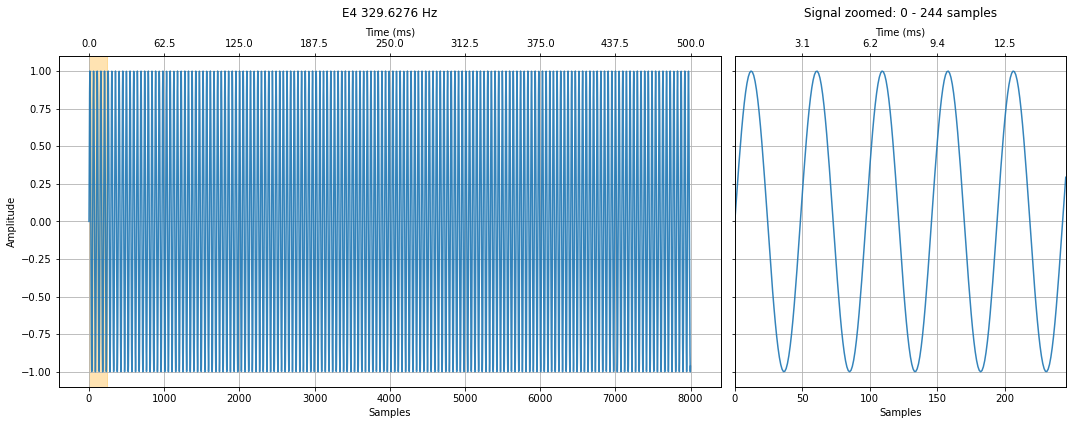

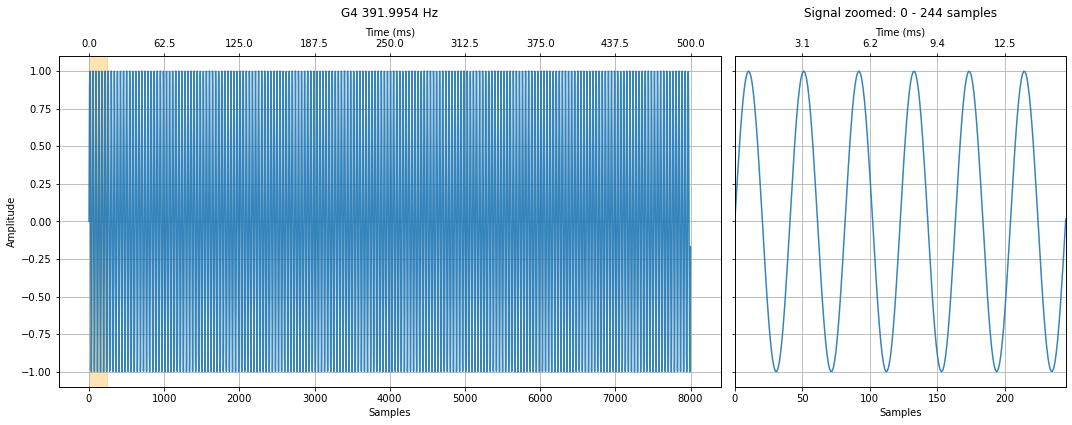

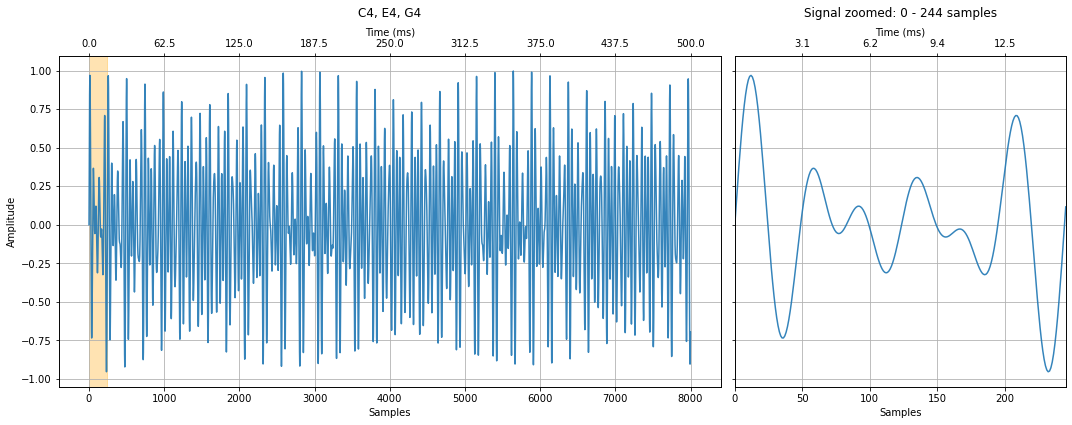

In [13]:
#C4= 261,626  E4=329,628, G4= 391,995 
c4_signal = makelab.signal.create_sine_wave(261.6256, sampling_rate, total_time_in_secs)
e4_signal = makelab.signal.create_sine_wave(329.6276, sampling_rate, total_time_in_secs)
g4_signal = makelab.signal.create_sine_wave(391.9954, sampling_rate, total_time_in_secs)
your_chord = c4_signal + e4_signal + g4_signal
your_chord = your_chord / 3 # normalizar dividiendo por el número de señales para obtener -1 a 1 forma de onda
zoom_show_num_periods = 3
xlim_zoom = (0, zoom_show_num_periods * 1 / 195.9977 * sampling_rate)

makelab.signal.plot_signal(c4_signal, sampling_rate, title = "C4 261.6256 Hz", xlim_zoom = xlim_zoom)
makelab.signal.plot_signal(e4_signal, sampling_rate, title = "E4 329.6276 Hz", xlim_zoom = xlim_zoom)
makelab.signal.plot_signal(g4_signal, sampling_rate, title = "G4 391.9954 Hz", xlim_zoom = xlim_zoom)
makelab.signal.plot_signal(your_chord, sampling_rate, title = "C4, E4, G4", xlim_zoom = xlim_zoom)

ipd.Audio(your_chord, rate=sampling_rate)

## Crea una función que reciba tonos y te permita crear acordes. Los argumentos son dos matrices. Una matriz recibió las frecuencias y la otra matriz las amplificaciones.
## Para cada frecuencia debe haber una amplificación y las amplificaciones deben sumar 1.

In [14]:
def compute_fft(s, sampling_rate, n = None, scale_amplitudes = True):
    '''Computes an FFT on signal s using numpy.fft.fft.
    
       Parameters:
        s (np.array): the signal
        sampling_rate (num): sampling rate
        n (integer): If n is smaller than the length of the input, the input is cropped. If n is 
            larger, the input is padded with zeros. If n is not given, the length of the input signal 
            is used (i.e., len(s))
        scale_amplitudes (boolean): If true, the spectrum amplitudes are scaled by 2/len(s)
    '''
    if n == None:
        n = len(s)
        
    fft_result = np.fft.fft(s, n)
    num_freq_bins = len(fft_result)
    fft_freqs = np.fft.fftfreq(num_freq_bins, d = 1 / sampling_rate)
    half_freq_bins = num_freq_bins // 2

    fft_freqs = fft_freqs[:half_freq_bins]
    fft_result = fft_result[:half_freq_bins]
    fft_amplitudes = np.abs(fft_result)
    
    if scale_amplitudes is True:
        fft_amplitudes = 2 * fft_amplitudes / (len(s))
    
    return (fft_freqs, fft_amplitudes)

def get_freq_and_amplitude_csv(freqs, amplitudes):
    '''Convenience function to convert a freq and amplitude array to a csv string'''
    freq_peaks_with_amplitudes_csv = ""
    for i in range(len(freqs)):
        freq_peaks_with_amplitudes_csv += f"{freqs[i]} Hz ({amplitudes[i]:0.2f})"
        if i + 1 is not len(freqs):
            freq_peaks_with_amplitudes_csv += ", "
    return freq_peaks_with_amplitudes_csv

def get_top_n_frequency_peaks(n, freqs, amplitudes, min_amplitude_threshold = None):
    ''' Finds the top N frequencies and returns a sorted list of tuples (freq, amplitudes) '''
    
    # Use SciPy signal.find_peaks to find the frequency peaks
    # TODO: in future, could add in support for min horizontal distance so we don't find peaks close together
    fft_peaks_indices, fft_peaks_props = sp.signal.find_peaks(amplitudes, height = min_amplitude_threshold)
    
    freqs_at_peaks = freqs[fft_peaks_indices]
    amplitudes_at_peaks = amplitudes[fft_peaks_indices]
    
    if n < len(amplitudes_at_peaks):
        ind = np.argpartition(amplitudes_at_peaks, -n)[-n:] # from https://stackoverflow.com/a/23734295
        ind_sorted_by_coef = ind[np.argsort(-amplitudes_at_peaks[ind])] # reverse sort indices
    else:
        ind_sorted_by_coef = np.argsort(-amplitudes_at_peaks)

    return_list = list(zip(freqs_at_peaks[ind_sorted_by_coef], amplitudes_at_peaks[ind_sorted_by_coef]))
    return return_list

def get_top_n_frequencies(n, freqs, amplitudes, min_amplitude_threshold = None):
    '''
    Gets the top N frequencies: a sorted list of tuples (freq, amplitudes)
    
    This is a rather naive implementation. For a better implementation, see get_top_n_frequency_peaks
    
    '''
    
    #print(amplitudes)
    if min_amplitude_threshold is not None:
        amplitude_indices = np.where(amplitudes >= min_amplitude_threshold)
        amplitudes = amplitudes[amplitude_indices]
        freqs = freqs[amplitude_indices]
        
    if n < len(amplitudes):
        ind = np.argpartition(amplitudes, -n)[-n:] # from https://stackoverflow.com/a/23734295
        ind_sorted_by_coef = ind[np.argsort(-amplitudes[ind])] # reverse sort indices
    else:
        ind_sorted_by_coef = np.argsort(-amplitudes)

    return_list = list(zip(freqs[ind_sorted_by_coef], amplitudes[ind_sorted_by_coef]))
    return return_list

def calc_and_plot_xcorr_dft_with_ground_truth(s, sampling_rate, 
                                              time_domain_graph_title = None,
                                              xcorr_freq_step_size = None,
                                              xcorr_comparison_signal_length_in_secs = 0.5,
                                              normalize_xcorr_result = True,
                                              include_annotations = True,
                                              minimum_freq_amplitude = 0.08,
                                              y_axis_amplitude = True,
                                              fft_pad_to = None):
    '''
    Calculates and plots a "brute force" DFT using cross correlation along with a ground truth
    DFT using matplotlib's magnitude_spectrum method.
    
    Parameters:
        s (np.array): the signal
        sampling_rate (num): sampling rate
        xcorr_comparison_signal_length_in_secs (float): specifies the time for the comparison signals (500ms is default)
        xcorr_freq_step_size (float): the step size to use for enumerating frequencies
            for the cross-correlation method of DFT. For example, setting this to 0.1, will enumerate
            frequencies with a step size of 0.1 from 1 to nyquist_limit. If None, defaults to step
            size of 1
        normalize_xcorr_result (boolean): if True, defaults to normalization. Otherwise, not.
        y_axis_amplitude (boolean): if True, normalizes the spectrum transform to show amplitudes
    '''
    
    total_time_in_secs = len(s) / sampling_rate
    
    # Enumerate through frequencies from 1 to the nyquist limit
    # and run a cross-correlation comparing each freq to the signal
    freq_and_correlation_results = [] # tuple of (freq, max correlation result)
    nyquist_limit = sampling_rate // 2
    
    freq_step_size = 1
    freq_seq_iter = range(1, nyquist_limit)
    if xcorr_freq_step_size is not None:
        freq_seq_iter = np.arange(1, nyquist_limit, xcorr_freq_step_size)
        freq_step_size = xcorr_freq_step_size
    
    progress_bar = ipywidgets.FloatProgress(value=1, min=1, max=nyquist_limit)
    ipd.display(progress_bar)
    num_comparisons = 0
    for test_freq in freq_seq_iter:
        signal_to_test = makelab.signal.create_sine_wave(test_freq, 
                                                         sampling_rate, 
                                                         xcorr_comparison_signal_length_in_secs)
        correlate_result = np.correlate(s, signal_to_test, 'full')

        # Add in the tuple of test_freq, max correlation result value
        freq_and_correlation_results.append((test_freq, np.max(correlate_result)))
        
        num_comparisons += 1
        progress_bar.value += freq_step_size

    # The `freq_and_correlation_results` is a list of tuple results with (freq, correlation result)
    # Unpack this tuple list into two separate lists freqs, and correlation_results
    correlation_freqs, correlation_results = list(zip(*freq_and_correlation_results))
    
    correlation_freqs = np.array(correlation_freqs)
    correlation_results = np.array(correlation_results)
    correlation_results_original = correlation_results
    
    cross_correlation_ylabel = "Cross-correlation result"
    if normalize_xcorr_result:
        correlation_results = correlation_results / (nyquist_limit - 1)
        cross_correlation_ylabel += " (normalized)"
        
    if y_axis_amplitude:
        correlation_results = (correlation_results_original / (nyquist_limit - 1)) * 2
        cross_correlation_ylabel = "Frequency Amplitude"

    # Plotting
    fig, axes = plt.subplots(3, 1, figsize=(15, 12))

    # Plot the signal in the time domain
    makelab.signal.plot_signal_to_axes(axes[0], s, sampling_rate, title = time_domain_graph_title)
    axes[0].set_title(axes[0].get_title(), y=1.2)

    # Plot the signal correlations (our brute force approach)
    axes[1].plot(correlation_freqs, correlation_results)
    axes[1].set_title("Brute force DFT using cross correlation")
    axes[1].set_xlabel("Frequency")
    axes[1].set_ylabel(cross_correlation_ylabel)

    # Plot the "ground truth" via an FFT
    # https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.magnitude_spectrum.html
    # Use zero padding to obtain a more accurate estimate of the sinusoidal amplitudes
    # See: https://www.mathworks.com/help/signal/ug/amplitude-estimation-and-zero-padding.html
    if fft_pad_to is None:
        fft_pad_to = len(s) * 4
    elif fft_pad_to == 0:
        fft_pad_to = None
    
    fft_spectrum, fft_freqs, line = axes[2].magnitude_spectrum(s, Fs = sampling_rate, color='r',
                                                                   pad_to = fft_pad_to)
    if y_axis_amplitude:
        # By default, the magnitude_spectrum plots half amplitudes (perhaps because it's
        # showing only one-half of the full FFT (the positive frequencies). But there is not
        # way to control this to show full amplitudes by passing in a normalization parameter
        # So, instead, we'll do it by hand here (delete the old line and plot the normalized spectrum)
        line.remove()
        fft_spectrum = np.array(fft_spectrum) * 2
        axes[2].plot(fft_freqs, fft_spectrum, color = 'r')
        axes[2].set_ylabel("Frequency Amplitude")
    
    axes[2].set_title("Using built-in FFT via matplotlib.pyplot.magnitude_spectrum")

    # Find the number of peaks
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks_cwt.html
    # Du et al., Improved Peak Detection, Bioinformatics: https://academic.oup.com/bioinformatics/article/22/17/2059/274284
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html
    xcorr_dft_peaks_indices, xcorr_dft_peaks_props = sp.signal.find_peaks(correlation_results, height = minimum_freq_amplitude)
    xcorr_freq_peaks = correlation_freqs[xcorr_dft_peaks_indices]
    xcorr_freq_peak_amplitudes = correlation_results[xcorr_dft_peaks_indices]
    xcorr_freq_peaks_csv = ", ".join(map(str, xcorr_freq_peaks))
    xcorr_freq_peaks_with_amplitudes_csv = get_freq_and_amplitude_csv(xcorr_freq_peaks, xcorr_freq_peak_amplitudes)
    xcorr_freq_peaks_array_str = [f"{freq} Hz" for freq in xcorr_freq_peaks]
    
    fft_peaks_indices, fft_peaks_props = sp.signal.find_peaks(fft_spectrum, height = minimum_freq_amplitude)
    fft_freq_peaks = fft_freqs[fft_peaks_indices]
    fft_freq_peaks_amplitudes = fft_spectrum[fft_peaks_indices]
    fft_freq_peaks_csv = ", ".join(map(str, fft_freq_peaks))
    fft_freq_peaks_with_amplitudes_csv = get_freq_and_amplitude_csv(fft_freq_peaks, fft_freq_peaks_amplitudes)
    fft_freq_peaks_array_str = [f"{freq} Hz" for freq in fft_freq_peaks]
    
    # Print out frequency analysis info and annotate plots
    if include_annotations:
        axes[1].plot(xcorr_freq_peaks, xcorr_freq_peak_amplitudes, linestyle='None', marker="x", color="red", alpha=0.8)
        for i in range(len(xcorr_freq_peaks)):
            axes[1].text(xcorr_freq_peaks[i] + 2, xcorr_freq_peak_amplitudes[i], f"{xcorr_freq_peaks[i]} Hz", color="red")
            
        axes[2].plot(fft_freq_peaks, fft_freq_peaks_amplitudes, linestyle='None', marker="x", color="black", alpha=0.8)
        for i in range(len(fft_freq_peaks)):
            axes[2].text(fft_freq_peaks[i] + 2, fft_freq_peaks_amplitudes[i], f"{fft_freq_peaks[i]} Hz", color="black")
    
    print("**Brute force cross-correlation DFT**")
    print(f"Num cross correlations: {num_comparisons}")
    print(f"Frequency step resolution for cross correlation: {freq_step_size}")
    print(f"Found {len(xcorr_dft_peaks_indices)} freq peak(s) at: {xcorr_freq_peaks_csv} Hz")
    print(f"The minimum peak amplitude threshold set to: {minimum_freq_amplitude}")
    print(f"Freq and amplitudes: {xcorr_freq_peaks_with_amplitudes_csv} Hz")

    print("")
    print("**Ground truth FFT**")
    print(f"Num FFT freq bins: {len(fft_freqs)}")
    print(f"FFT Freq bin spacing: {fft_freqs[1] - fft_freqs[0]}")
    print(f"Found {len(fft_peaks_indices)} freq peak(s) at: {fft_freq_peaks_csv} Hz")
    print(f"The minimum peak amplitude threshold set to: {minimum_freq_amplitude}")
    print(f"Freq and amplitudes: {fft_freq_peaks_with_amplitudes_csv} Hz")
    #print(fft_freqs[fft_peaks_indices] + "Hz")
   
    fig.tight_layout(pad=2)
    return (fig, axes, correlation_freqs, correlation_results, fft_freqs, fft_spectrum)

In [15]:
sampling_rate = 16000
total_time_in_secs = 0.5

freq1 = 10
freq2 = 42
freq3 = 151

signal1 = makelab.signal.create_sine_wave(freq1, sampling_rate, total_time_in_secs)
signal2 = makelab.signal.create_sine_wave(freq2, sampling_rate, total_time_in_secs)
signal3 = makelab.signal.create_sine_wave(freq3, sampling_rate, total_time_in_secs)

signal_composite = signal1 + signal2 + signal3
time_domain_title = f"Signal with freqs {freq1}Hz, {freq2}Hz, and {freq3}Hz sampled at 800Hz (length: {total_time_in_secs}s)"
calc_and_plot_xcorr_dft_with_ground_truth(signal_composite, sampling_rate, time_domain_graph_title = time_domain_title);

FloatProgress(value=1.0, max=8000.0, min=1.0)

NameError: name 'np' is not defined

In [16]:
ipd.Audio(signal1 , rate=sampling_rate) 

In [17]:
ipd.Audio(signal2 , rate=sampling_rate)

In [18]:
ipd.Audio(signal3 , rate=sampling_rate)

In [19]:
ipd.Audio(signal_composite , rate=sampling_rate)

## 7. Use the DFFT analysis to visualize your chords and pure tones. Grades will be provided as first arrived, first served.

In [20]:
signal_composite = 0.8 * signal1 + 0.1 * signal2 + 0.1 * signal3
time_domain_title = f"0.8 * {freq1}Hz, 0.1 * {freq2}Hz, and 0.1 * {freq3}Hz sampled at 800Hz (length: {total_time_in_secs}s)"
calc_and_plot_xcorr_dft_with_ground_truth(signal_composite, sampling_rate, 
                                                time_domain_graph_title = time_domain_title);

FloatProgress(value=1.0, max=8000.0, min=1.0)

NameError: name 'np' is not defined

In [21]:
ipd.Audio(signal_composite , rate=sampling_rate)

In [22]:
signal_composite = 0.2 * signal1 + 0.2 * signal2 + 0.6 * signal3
time_domain_title = f"0.2 * {freq1}Hz, 0.2 * {freq2}Hz, and 0.6 * {freq3}Hz sampled at 800Hz (length: {total_time_in_secs}s)"
calc_and_plot_xcorr_dft_with_ground_truth(signal_composite, sampling_rate, 
                                                time_domain_graph_title = time_domain_title);

FloatProgress(value=1.0, max=8000.0, min=1.0)

NameError: name 'np' is not defined

In [23]:
ipd.Audio(signal_composite , rate=sampling_rate)

In [ ]:
freq4 = 222
freq5 = 347

signal4 = makelab.signal.create_sine_wave(freq4, sampling_rate, total_time_in_secs)
signal5 = makelab.signal.create_sine_wave(freq5, sampling_rate, total_time_in_secs)

signal_composite = 0.5 * signal1 + 0.3 * signal2 + 0.2 * signal3 + 1 * signal4 + 0.8 * signal5
time_domain_title = f"5-frequency signal sampled at 800Hz (length: {total_time_in_secs}s)"
calc_and_plot_xcorr_dft_with_ground_truth(signal_composite, sampling_rate, 
                                                time_domain_graph_title = time_domain_title);

In [ ]:
ipd.Audio(signal4 , rate=sampling_rate)

In [ ]:
ipd.Audio(signal5 , rate=sampling_rate)

In [ ]:
ipd.Audio(signal_composite , rate=sampling_rate) 